In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
target=df[['Profit']]
target

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [6]:
feature=df.drop('Profit',axis=1)
feature

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [7]:
feature=pd.get_dummies(feature,dtype=int)  #It is used to conver the character value to integer value.
feature

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [8]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.70,random_state=10)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 6)
(15, 6)
(35, 1)
(15, 1)


In [10]:
lin_model=LinearRegression()

In [11]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred=lin_model.predict(x_test)
y_pred

array([[ 88747.29562603],
       [108285.64828058],
       [ 67559.62122404],
       [ 71615.54776723],
       [ 49467.8849317 ],
       [116587.75381426],
       [170839.49557065],
       [ 98588.69604148],
       [157921.40321395],
       [157978.70666828],
       [ 83938.28393212],
       [178059.49024332],
       [ 76278.75354888],
       [100205.00057175],
       [133275.0841475 ]])

In [13]:
r2_score(y_test,y_pred)

0.9796796125083208

In [14]:
lin_model.coef_

array([[ 7.82016508e-01,  1.77233901e-03,  2.51998588e-02,
         9.26067074e+02, -6.95256133e+02, -2.30810941e+02]])

In [15]:
lin_model.intercept_

array([48301.79544458])

In [16]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [17]:
df.cov()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,2.107017e+09,3.111739e+08,4.065495e+09,1.800007e+09
Administration,3.111739e+08,7.849973e+08,-1.101690e+08,2.266673e+08
Marketing Spend,4.065495e+09,-1.101690e+08,1.495492e+10,3.685779e+09
Profit,1.800007e+09,2.266673e+08,3.685779e+09,1.624588e+09


In [18]:
df.skew()

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_3932\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

In [19]:
df.kurt()

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_3932\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


R&D Spend         -0.761465
Administration     0.225071
Marketing Spend   -0.671701
Profit            -0.063859
dtype: float64

In [20]:
import seaborn as sns

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

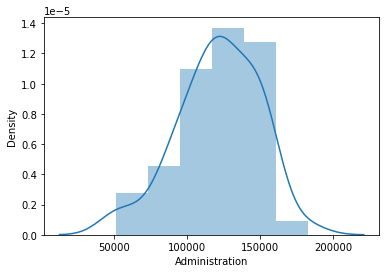

In [21]:
sns.distplot(df['Administration'])

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

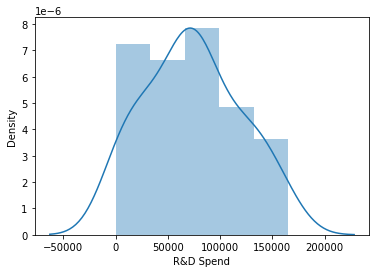

In [22]:
sns.distplot(df['R&D Spend'])

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

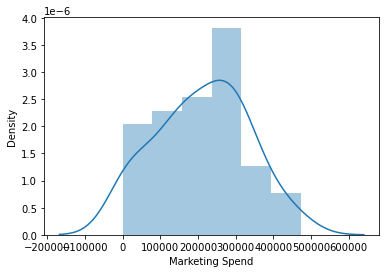

In [23]:
sns.distplot(df['Marketing Spend'])

<AxesSubplot:>

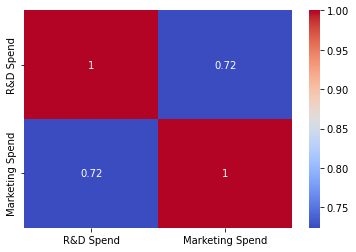

In [24]:
sns.heatmap(df[['R&D Spend','Marketing Spend']].corr(),annot=True,cmap='coolwarm')

# Using Statsmodels:

In [25]:
feature=df.rename({'R&D Spend':'r&d_spend','Administration':'administration','Marketing Spend':'marketing_spend'},axis=1)
feature

,r&d_spend,administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [26]:
df1=pd.read_csv('ToyotaCorolla - MLR.csv')
df1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [27]:
df1.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [28]:
df1.duplicated().sum()

1

In [45]:
df1.describe()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [30]:
df1.shape

(1436, 11)

In [38]:
import statsmodels.formula.api as sfa

In [39]:
model=sfa.ols('Weight~Doors+Cylinders+Gears',data=df1).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     76.50
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           2.70e-32
Time:                        23:09:12   Log-Likelihood:                -7655.8
No. Observations:                1436   AIC:                         1.532e+04
Df Residuals:                    1433   BIC:                         1.533e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.1163      2.180     24.364      0.000      48.840      57.393
Doors         17.3488      1.406     12.342      0.000      14.591      20.106
Cylinders    212.4652      8.721     24.364      0.000     195.359     229.572
Gears         19.7967      7.104      2.787      0.005       5.862      33.731
==============================================================================
Omnibus:                     1135.548   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31622.058
Skew:                           3.476   Prob(JB):                         0.00
Kurtosis:                      24.913   Cond. No.                     1.66e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.06e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
df1.corr()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Age_08_04,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [42]:
df1.cov()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Age_08_04,345.959566,3.527668e+05,-43.642398,0.135355,-7.742327e+02,-2.628892,0.0,-0.018808,-460.436285
KM,352766.779610,1.406734e+09,-187410.669881,-704.397756,1.634428e+06,-1293.359908,0.0,106.220299,-56464.263717
HP,-43.642398,-1.874107e+05,224.432748,0.045180,2.279630e+02,1.319094,0.0,0.591582,70.671513
Automatic,0.135355,-7.043978e+02,0.045180,0.052643,6.498629e+00,-0.006045,0.0,-0.004263,0.691450
cc,-774.232722,1.634428e+06,227.963019,6.498629,1.801041e+05,32.305170,0.0,1.170368,7498.204975
Doors,-2.628892,-1.293360e+03,1.319094,-0.006045,3.230517e+01,0.907593,0.0,-0.028760,15.176264
Cylinders,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000
Gears,-0.018808,1.062203e+02,0.591582,-0.004263,1.170368e+00,-0.028760,0.0,0.035536,0.204554
Weight,-460.436285,-5.646426e+04,70.671513,0.691450,7.498205e+03,15.176264,0.0,0.204554,2771.087566


In [48]:
model1=sfa.ols('KM~Weight',data=df1).fit()
model1

In [49]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.174
Date:                Wed, 17 Apr 2024   Prob (F-statistic):              0.279
Time:                        23:15:02   Log-Likelihood:                -17161.
No. Observations:                1436   AIC:                         3.433e+04
Df Residuals:                    1434   BIC:                         3.434e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.039e+04   2.02e+04      4.476      0.000    5.08e+04     1.3e+05
Weight       -20.3762     18.807     -1.083      0.279     -57.269      16.517
==============================================================================
Omnibus:                      246.366   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              449.805
Skew:                           1.053   Prob(JB):                     2.12e-98
Kurtosis:                       4.755   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model1.rsquared

0.000817871727030961

In [51]:
model1.rsquared_adj

0.00012109200020193889

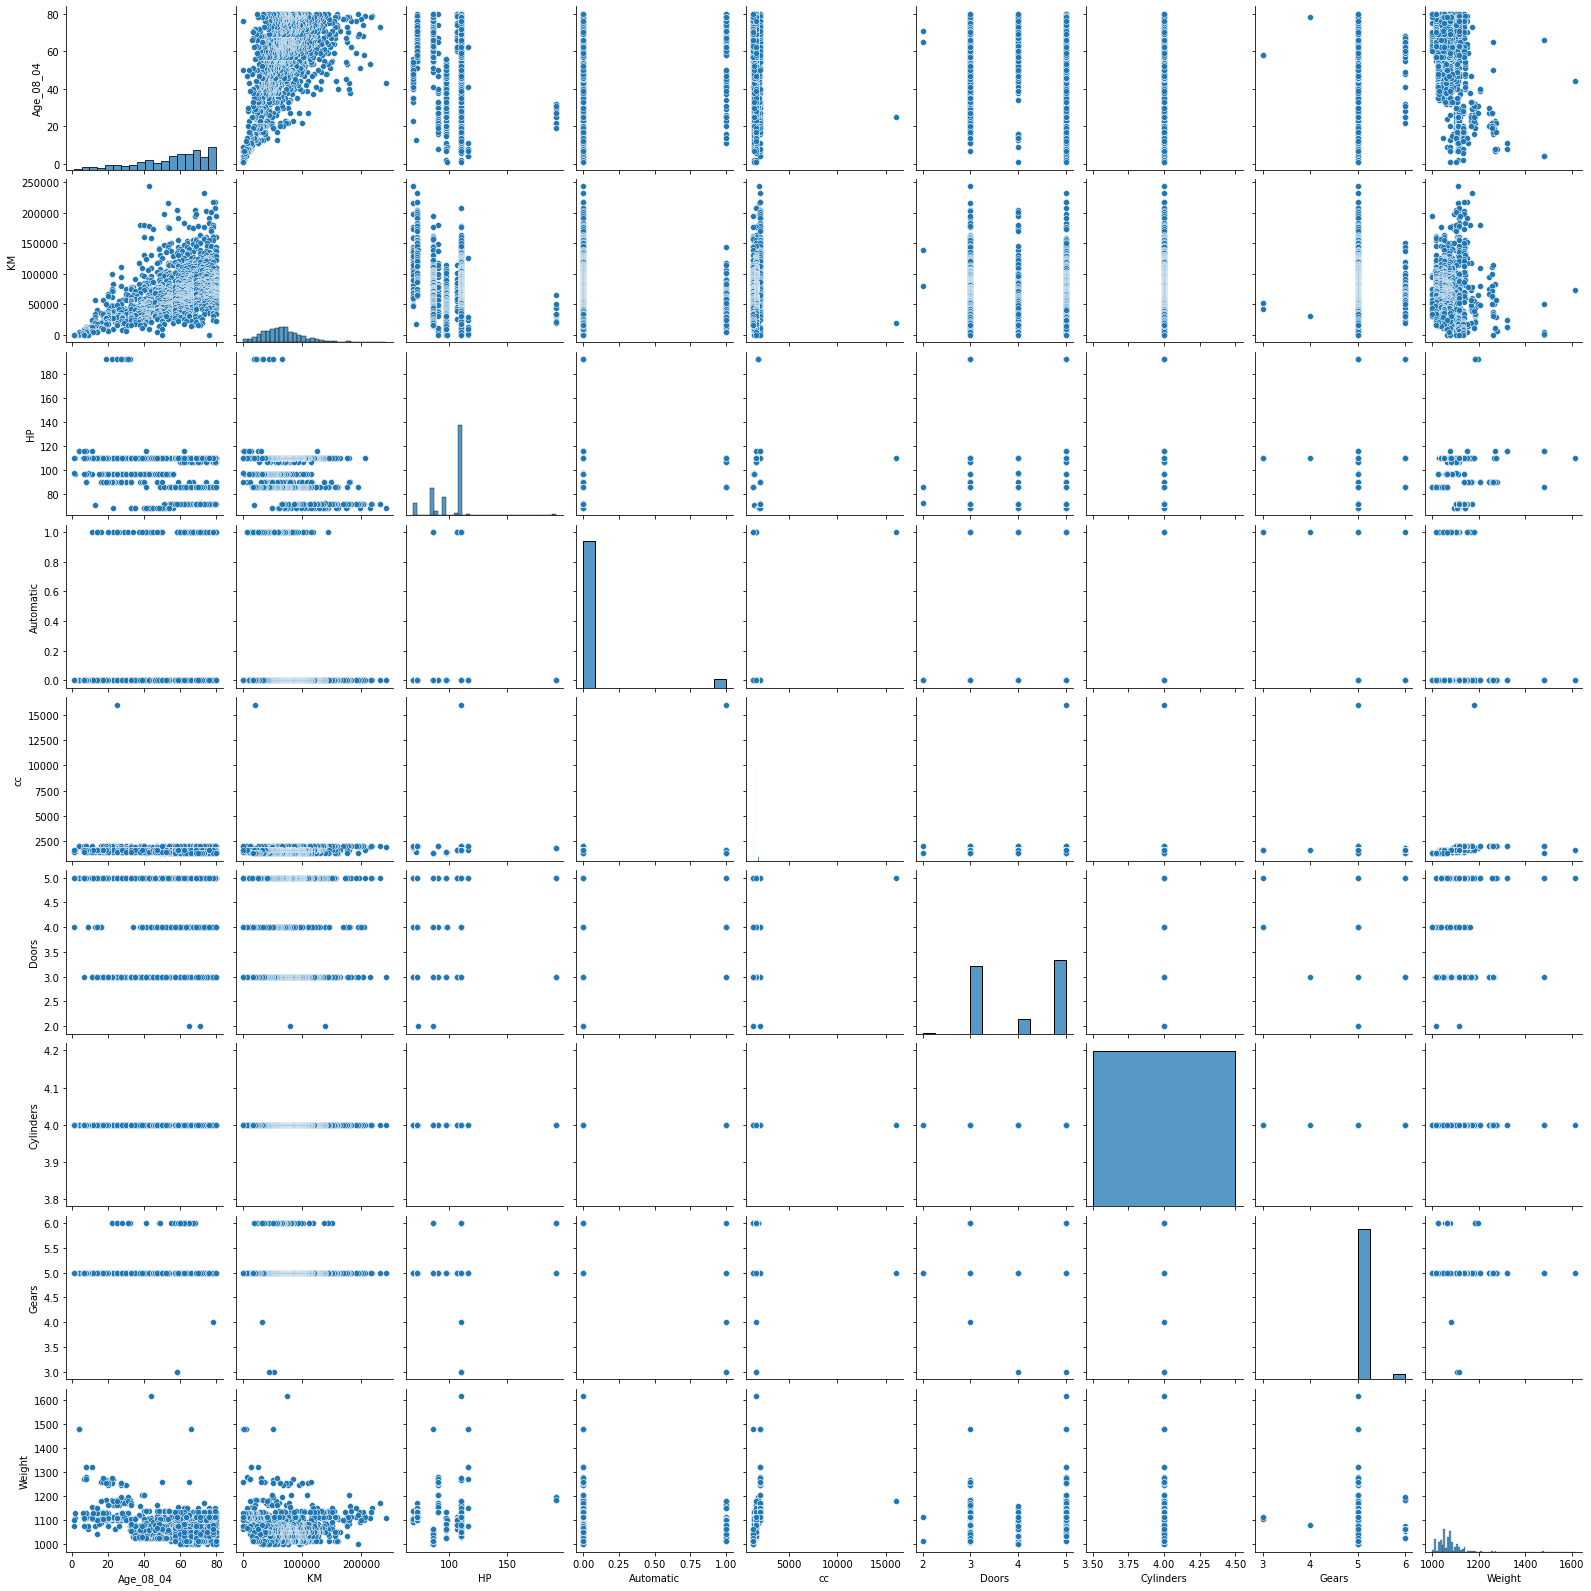

In [52]:
sns.pairplot(df1)

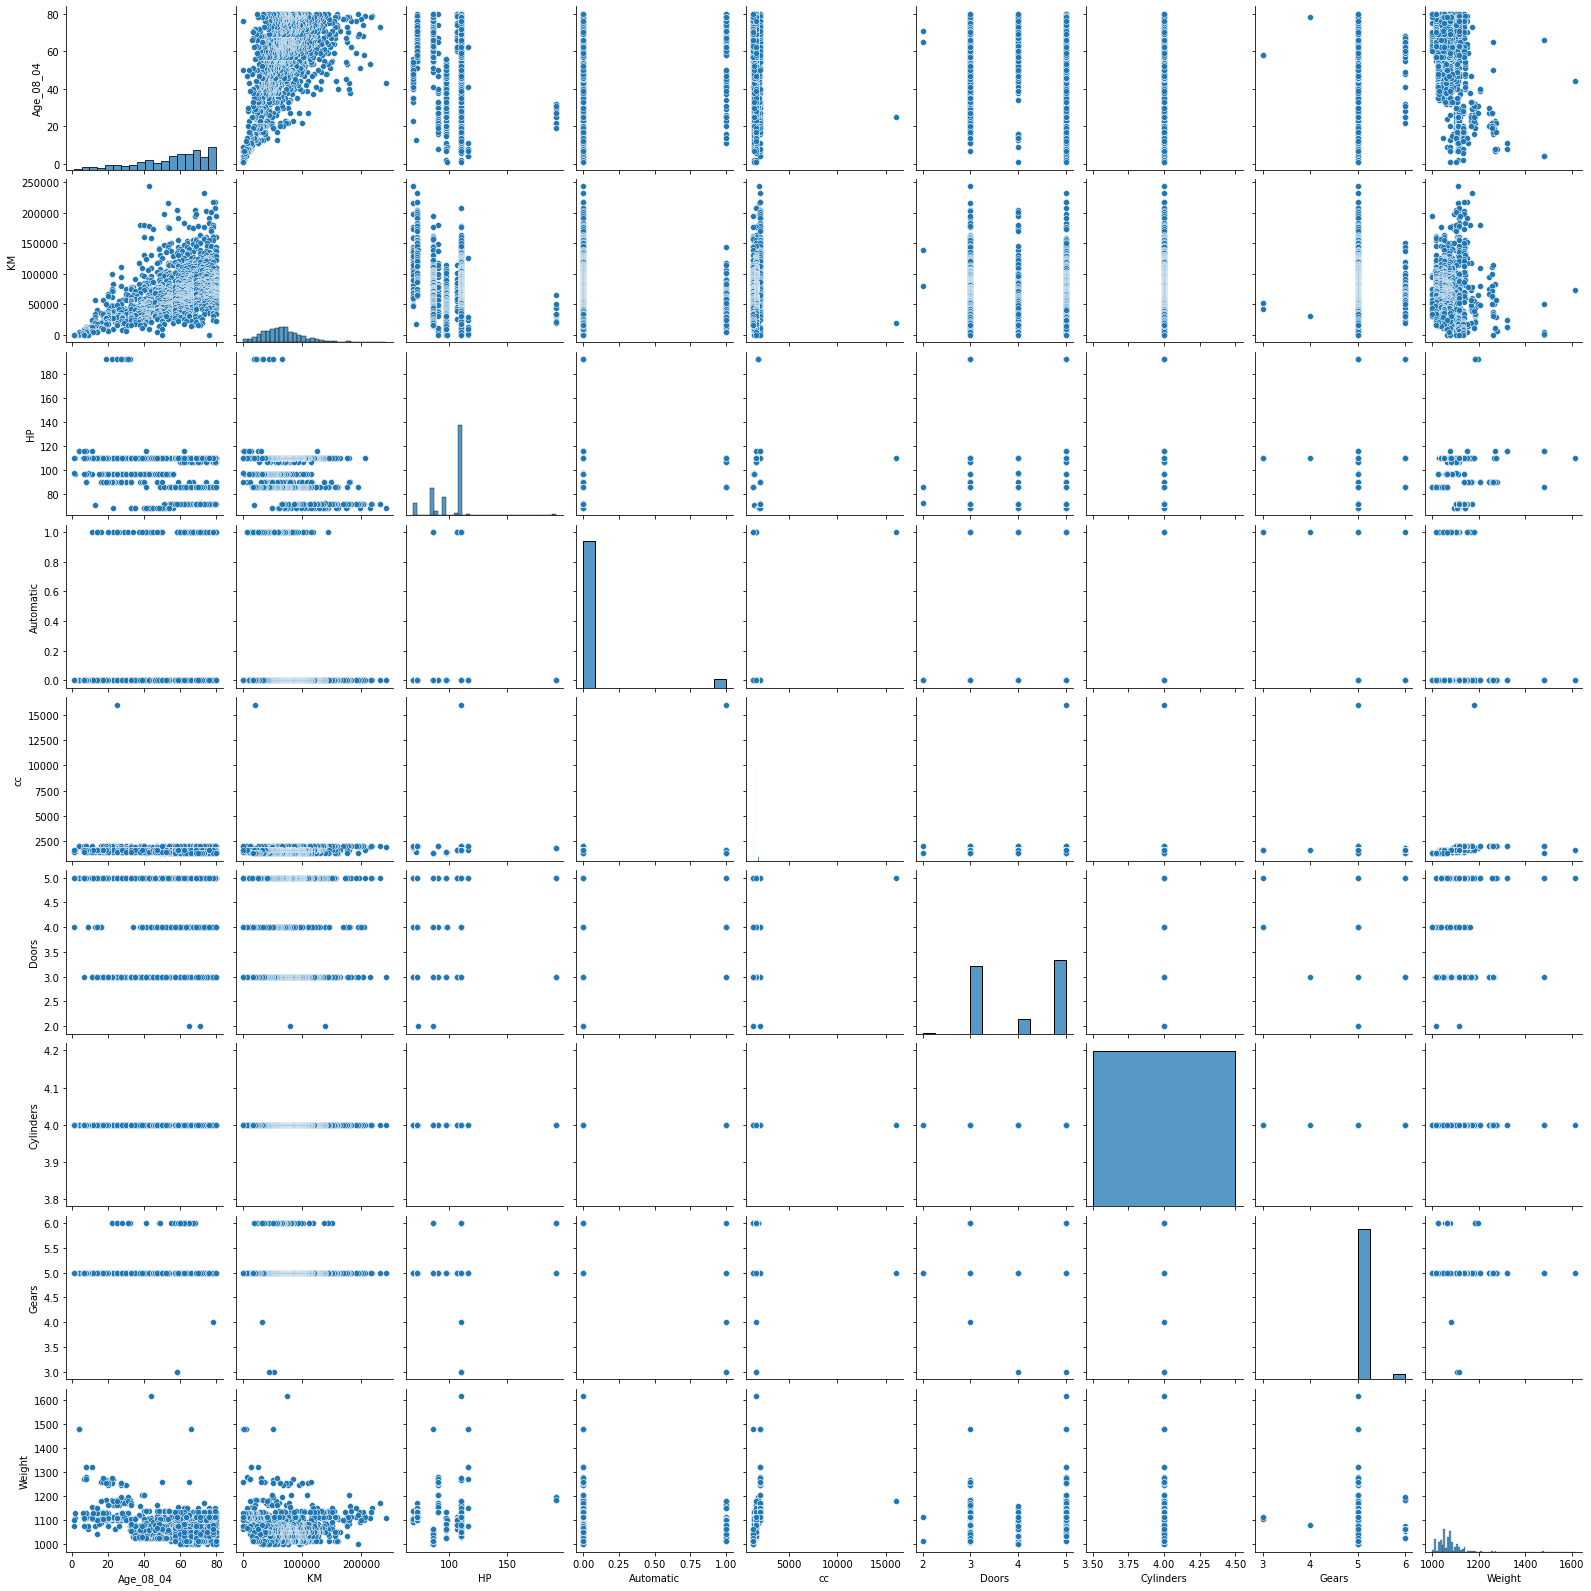

In [53]:
sns.pairplot(feature1)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

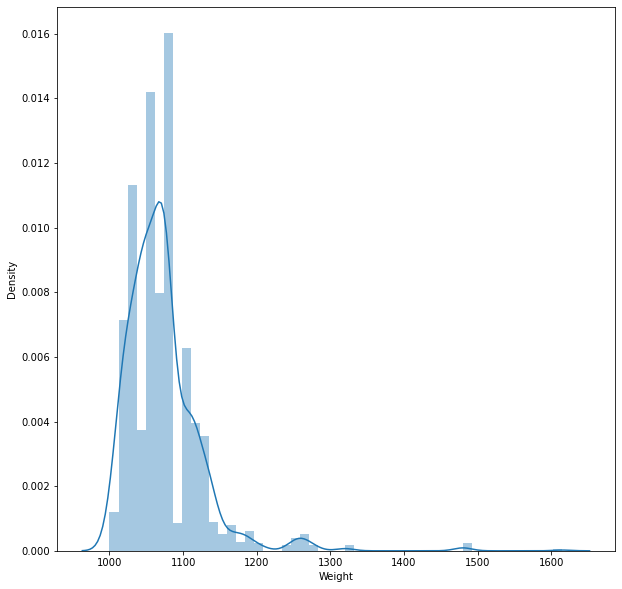

In [54]:
fig=plt.figure(figsize=(10,10))
sns.distplot(df1['Weight'])

<Figure size 720x720 with 0 Axes>

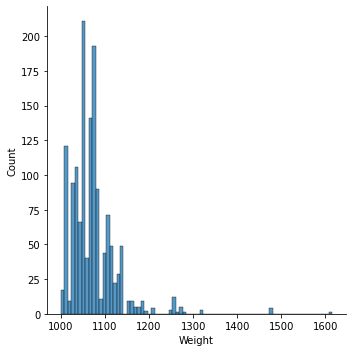

In [55]:
fig=plt.figure(figsize=(10,10))
sns.displot(df1['Weight'])

<AxesSubplot:>

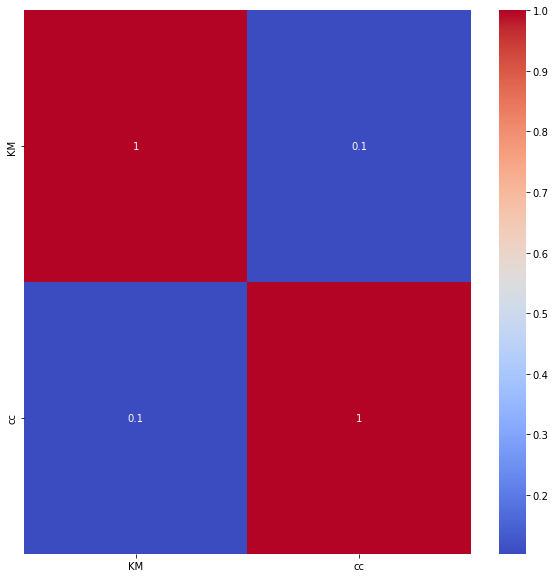

In [56]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df1[['KM','cc']].corr(),annot=True,cmap='coolwarm')

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

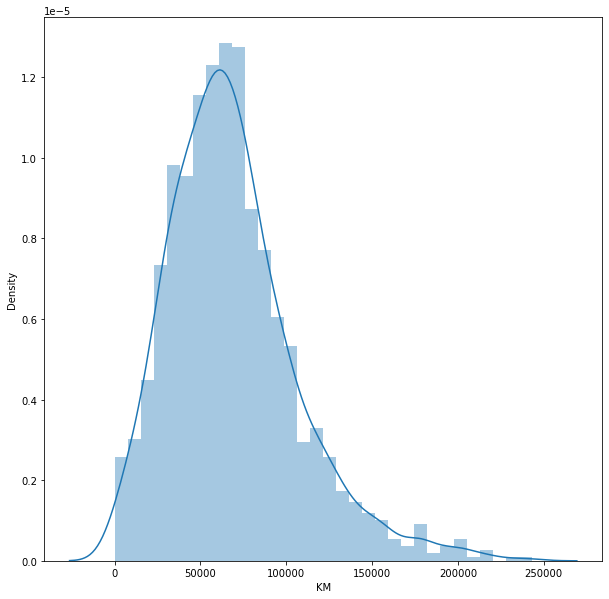

In [57]:
fig=plt.figure(figsize=(10,10))
sns.distplot(df1['KM'])

In [58]:
df1.skew()

Age_08_04    -0.826702
KM            1.015912
HP            0.955836
Automatic     3.878197
cc           27.431793
Doors        -0.076395
Cylinders     0.000000
Gears         2.283960
Weight        3.108639
dtype: float64

In [59]:
df1.kurt()

Age_08_04     -0.076632
KM             1.685057
HP             8.836434
Automatic     13.058597
cc           930.711227
Doors         -1.874765
Cylinders      0.000000
Gears         37.703476
Weight        19.362901
dtype: float64

In [60]:
lin_model.coef_

array([-1.21040260e+02, -2.03762612e-02,  3.07596966e+01,  4.46052819e+02,
       -8.12818699e-02,  2.53377327e+01,  1.15107923e-12,  7.59089260e+02,
        1.91554527e+01])

In [61]:
lin_model.intercept_

-8520.932356466788